# Project Part 1

## Introduction/Background

I will be using the rotten_tomatoes dataset from huggingface, found here https://huggingface.co/datasets/rotten_tomatoes. This dataset contains two variables, text and label. Text is a sentence taken from moive reviews from the site Rotten Tomatoes. Each review is categorized as either a poisitve or a negative review. This value is stored in the label variable, where 1 is a positive review and 0 is a negative one. This dataset will be used to classify movie reviews as either positive or negative.  

## Exploratory Data Analysis

Helpful Links for EDA:

* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [4]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from textstat import flesch_reading_ease

The first step was to actually download the datasets from hugging face and convert them into Panda data frames. This data was already split into three data sets for training, validation, and testing. I combined this into one dataset so I could look at all the data. 

In [ ]:
# download rotten_tomatoes dataset
from datasets import load_dataset

dataset = load_dataset("rotten_tomatoes")

In [5]:
# convert to Pandas
df_train = pd.DataFrame(dataset['train'])
df_validation = pd.DataFrame(dataset['validation'])
df_test = pd.DataFrame(dataset['test'])

df_all = pd.concat([df_train, df_validation, df_test])

In [6]:
# shape of each dataframe
print('df_train shape:', df_train.shape)
print('df_validation shape:', df_validation.shape)
print('df_test shape:', df_test.shape)
print('df_all shape:', df_all.shape)

df_train shape: (8530, 2)
df_validation shape: (1066, 2)
df_test shape: (1066, 2)
df_all shape: (10662, 2)


Here you can see all together there are 10,662 reviews in this dataset. 

In [7]:
# look at data 
df_all

,text,label
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1
...,...,...
1061,a terrible movie that some people will neverth...,0
1062,there are many definitions of 'time waster' bu...,0
1063,"as it stands , crocodile hunter has the hurrie...",0
1064,the thing looks like a made-for-home-video qui...,0


### Pre Processing

Next, I did some basic pre-processing of the data which I stored in a new variable text1. I converted everything to lowercase and removed punctuation and stopwords.

In [8]:
# Convert to lowercase
df_all['text1'] = df_all['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_all['text1'].head()

0    the rock is destined to be the 21st century's ...
1    the gorgeously elaborate continuation of " the...
2                       effective but too-tepid biopic
3    if you sometimes like to go to the movies to h...
4    emerges as something rare , an issue movie tha...
Name: text1, dtype: object

In [58]:
# remove punctuation
df_all['text1'] = df_all['text1'].str.replace('[^\w\s]', '')
df_all['text1'].head()

c:\Users\Shayne Kaiser\anaconda3\envs\nlpenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0    rock destined 21st centurys new conan hes goin...
1    gorgeously elaborate continuation lord rings t...
2                            effective tootepid biopic
3    sometimes like go movies fun wasabi good place...
4    emerges something rare issue movie thats hones...
Name: text1, dtype: object

In [10]:
# remove stopwords
stop = stopwords.words('english')
df_all['text1'] = df_all['text1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_all['text1']

0       rock destined 21st centurys new conan hes goin...
1       gorgeously elaborate continuation lord rings t...
2                               effective tootepid biopic
3       sometimes like go movies fun wasabi good place...
4       emerges something rare issue movie thats hones...
                              ...                        
1061       terrible movie people nevertheless find moving
1062    many definitions time waster movie must surely...
1063    stands crocodile hunter hurried badly cobbled ...
1064            thing looks like madeforhomevideo quickie
1065                           enigma wellmade dry placid
Name: text1, Length: 10662, dtype: object

In [11]:
# Look at data with new variable
df_all

,text,label,text1
0,the rock is destined to be the 21st century's ...,1,rock destined 21st centurys new conan hes goin...
1,"the gorgeously elaborate continuation of "" the...",1,gorgeously elaborate continuation lord rings t...
2,effective but too-tepid biopic,1,effective tootepid biopic
3,if you sometimes like to go to the movies to h...,1,sometimes like go movies fun wasabi good place...
4,"emerges as something rare , an issue movie tha...",1,emerges something rare issue movie thats hones...
...,...,...,...
1061,a terrible movie that some people will neverth...,0,terrible movie people nevertheless find moving
1062,there are many definitions of 'time waster' bu...,0,many definitions time waster movie must surely...
1063,"as it stands , crocodile hunter has the hurrie...",0,stands crocodile hunter hurried badly cobbled ...
1064,the thing looks like a made-for-home-video qui...,0,thing looks like madeforhomevideo quickie


### Text Statistics

The first thing I looked at was the basic statistics of the reviews.   

This first graph shows the number of characters in each review including stopwords and punctuation.

Text(0.5, 0, 'Number of Characters')

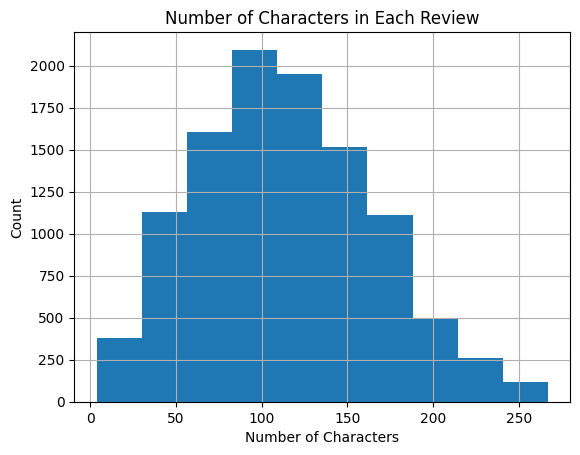

In [33]:
# number of characters in each review with stopwords and punctuation
df_all['text'].str.len().hist()
plt.title("Number of Characters in Each Review")
plt.ylabel("Count")
plt.xlabel("Number of Characters")

Looking at this graph, you can see that most reviews are around 100 characters with a maximum of around 275 and a minimum of around 10.  

I also wanted to look at the number of characters without stopwords or punctuation. 

Text(0.5, 0, 'Number of Characters')

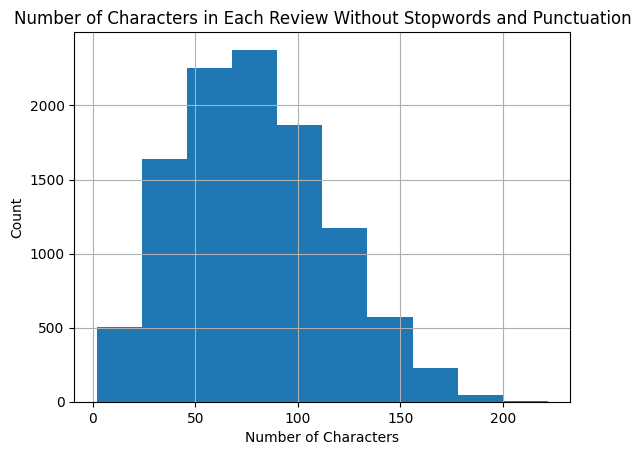

In [34]:
# number of characters in each review without stopwords and punctuation
df_all['text1'].str.len().hist()
plt.title("Number of Characters in Each Review Without Stopwords and Punctuation")
plt.ylabel("Count")
plt.xlabel("Number of Characters")

Without the stopwords and punctuation, it looks like the number of characters was reduced by around 50.  



Next, I looked at the number of words in each review.

Text(0, 0.5, 'Count')

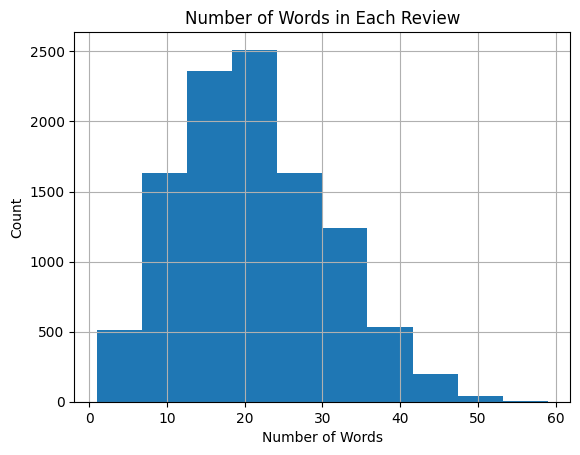

In [18]:
# number of words appearing in each review with stopwords
df_all['text'].str.split().map(lambda x: len(x)).hist()
plt.title("Number of Words in Each Review")
plt.xlabel('Number of Words')
plt.ylabel("Count")

This graph shows that the number of words in each review seems to be in the 10 to 30 words range with the maximum number close to 60.  

I also looked at the average word length for each review. 

Text(0, 0.5, 'Count')

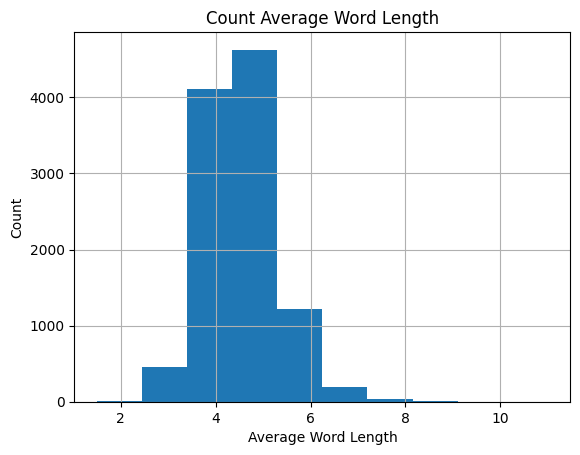

In [35]:
# average word length
df_all['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.title("Count Average Word Length")
plt.xlabel("Average Word Length")
plt.ylabel("Count")

It looks like most reviews average word lengths of 4 or 5.  

However, this may be influeneced by stopwords so I made the same graph without stopwords. 

Text(0, 0.5, 'Count')

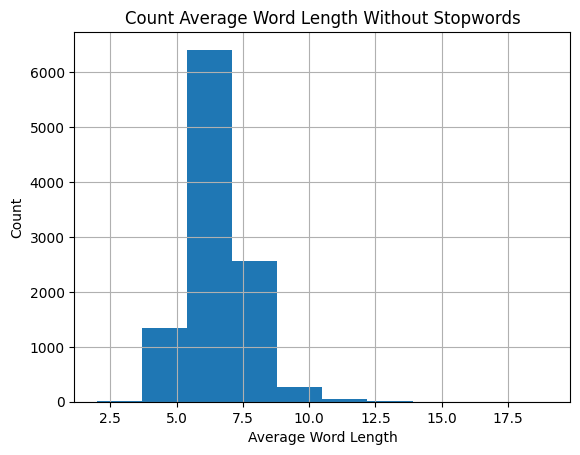

In [36]:
# average word length without stopwords
df_all['text1'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.title("Count Average Word Length Without Stopwords")
plt.xlabel("Average Word Length")
plt.ylabel("Count")

Without stopwords, the average word length is a bit higher around 6.  

Next I looked at the occurrence of stopwords in the reviews.

Text(0, 0.5, 'Count')

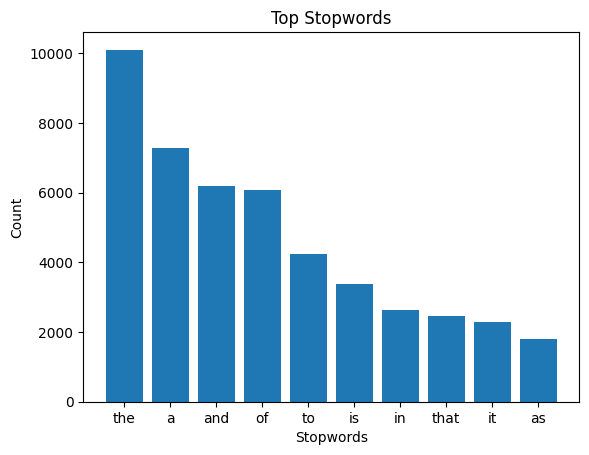

In [37]:
# top stopwords
stop = set(stopwords.words('english'))

corpus = []
text = df_all['text'].str.split()
text = text.values.tolist()
corpus = [word for i in text for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)
plt.title("Top Stopwords")
plt.xlabel("Stopwords")
plt.ylabel("Count")

You can see that the top stopword is the, however more importantly there seems to be a lot of stopwords in the data so they should be removed when creating models.  

I also looked at the most frequently occurring non-stopwords in the reviews. 

Text(0.5, 0, 'Count')

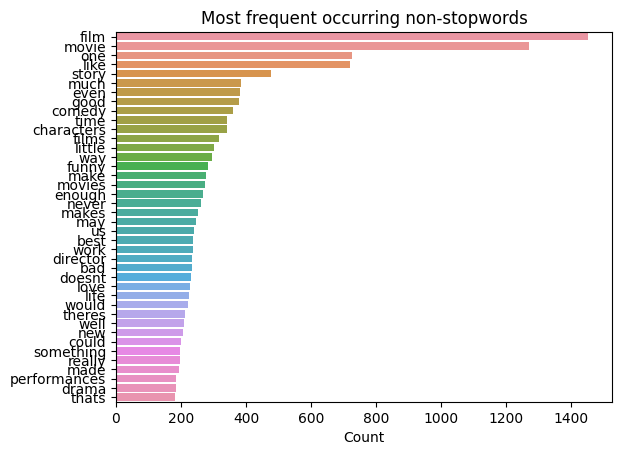

In [39]:
# Most frequent occuring non-stopwords

corpus = []
text = df_all['text1'].str.split()
text = text.values.tolist()
corpus = [word for i in text for word in i]

counter = Counter(corpus)
most = counter.most_common()
x, y=[], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
            
sns.barplot(x=y,y=x)
plt.title("Most frequent occurring non-stopwords")
plt.xlabel("Count")

There seem to be a couple of types of frequent words in this data. There are very common English words such as much, would, and could. These words don't seem very useful by themselves but may be more informative with context. There are film and movie specific words such as film and movie unsurprisingly, but also comedy, characters, director, and drama. There are also descriptive words that seem like they would greatly influence whether a review is positive or negative such as good, funny, best, and bad. 

### Ngram Exploration

I also did some Ngram exploration. Specifically, I looked at the most frequent bigrams and trigrams. 

In [20]:
# ngram graphing function
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    plt.xlabel("Count")


Text(0.5, 1.0, 'Top Bigrams with Stopwords')

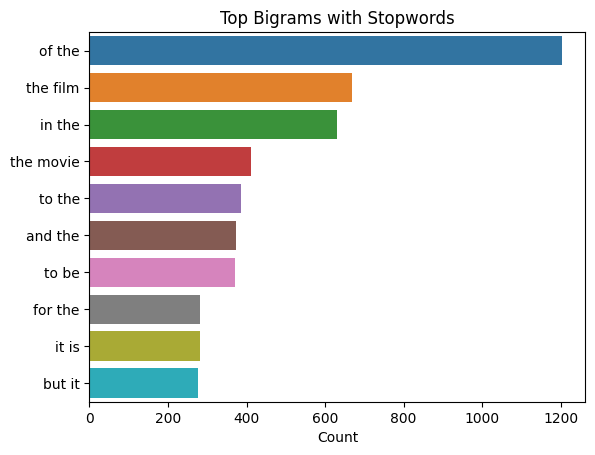

In [42]:
# top bigrams with stopwords
plot_top_ngrams_barchart(df_all['text'], 2)
plt.title("Top Bigrams with Stopwords")

These bigrams with Stopwords don't seem very useful. You can see that the film and the movie are very common which is unsurprising.   

I also looked at bigrams without stopwords.

Text(0.5, 1.0, 'Top Bigrams without Stopwords')

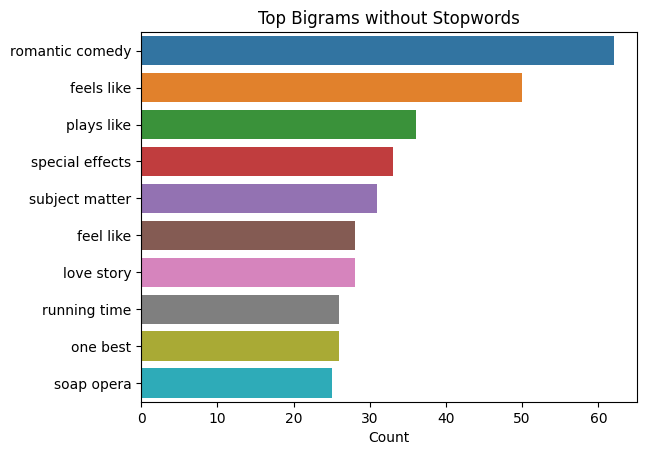

In [43]:
# top bigrams with stopwords
plot_top_ngrams_barchart(df_all['text1'], 2)
plt.title("Top Bigrams without Stopwords")

Here you can see more bigrams relating to movies like romantic comedy and special effects. 

I also looked at the top trigrams.

Text(0.5, 1.0, 'Top Trigrams with stopwords')

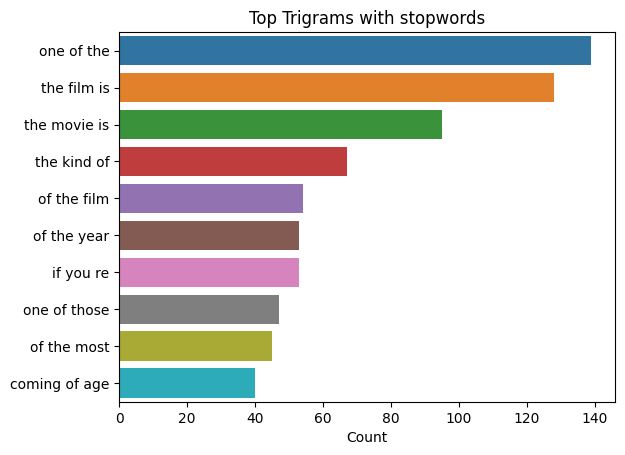

In [48]:
# top trigrams with stopwords
plot_top_ngrams_barchart(df_all['text'], 3)
plt.title("Top Trigrams with stopwords")

### Wordcloud

I also created a word cloud of reviews. This word cloud did involve lemmatization and removing stopwords. 

In [122]:
# make a word cloud
def plot_wordcloud(text):
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for df_all in text:
            words=[w for w in word_tokenize(df_all) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

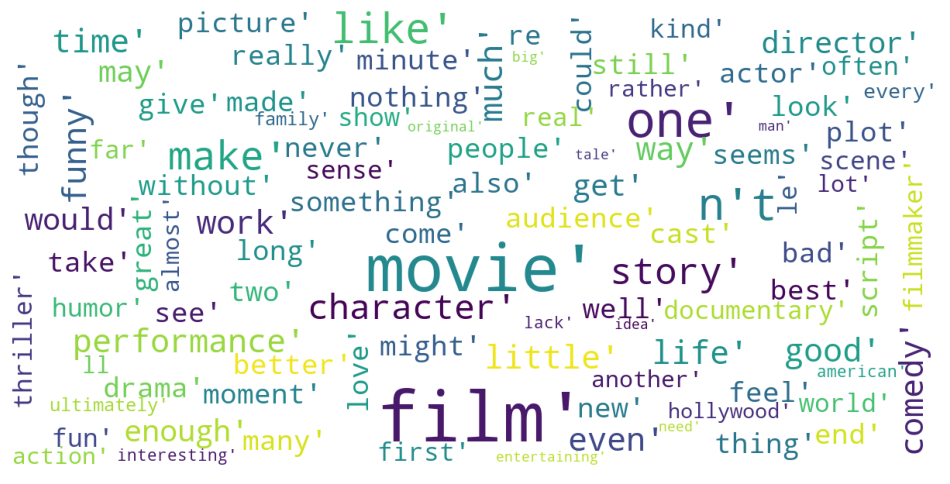

In [123]:
%%capture --no-display # hides all the messages 
plot_wordcloud(df_all['text'])

This word cloud doesn't seem to give much more information over the graph of the most frequently occurring words. You can see lots of film and movie terminology.

### Parts of Speech Tagging

Next, I did some parts of speech tagging and looked at the most frequent parts of speech used in the reviews.

In [23]:
# graph Parts of Speech

#nltk.download('averaged_perceptron_tagger')
def plot_parts_of_speech_barchart(text):
    def _get_pos(text):
        pos=nltk.pos_tag(word_tokenize(text))
        pos=list(map(list,zip(*pos)))[1]
        return pos
    
    tags=text.apply(lambda x : _get_pos(x))
    tags=[x for l in tags for x in l]
    counter=Counter(tags)
    x,y=list(map(list,zip(*counter.most_common(7))))
    
    sns.barplot(x=y,y=x)
    plt.xlabel("Count")

Text(0.5, 1.0, 'Top Parts of Speech without stopwords')

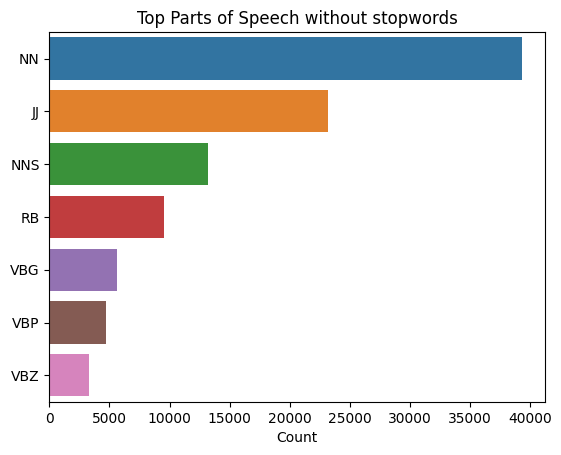

In [49]:
plot_parts_of_speech_barchart(df_all['text1'])
plt.title("Top Parts of Speech without stopwords")

You can see here that the most common types of speech are nouns and adjectives. This makes sense as most reviews are probably talking about a specific person or thing involved with the movie and describing it.  

I also wanted to look at which nouns and adjectvies were the most common.

In [25]:
# graph the most common POS 
def plot_most_common_part_of_speech_barchart(text, part_of_speech='NN'):  

    def _filter_pos(text):
        pos_type=[]
        pos=nltk.pos_tag(word_tokenize(text))
        for word,tag in pos:
            if tag==part_of_speech:
                pos_type.append(word)
        return pos_type


    words=text.apply(lambda x : _filter_pos(x))
    words=[x for l in words for x in l]
    counter=Counter(words)
    x,y=list(map(list,zip(*counter.most_common(7))))
    sns.barplot(x=y,y=x).set_title(part_of_speech)
    plt.xlabel("Count")

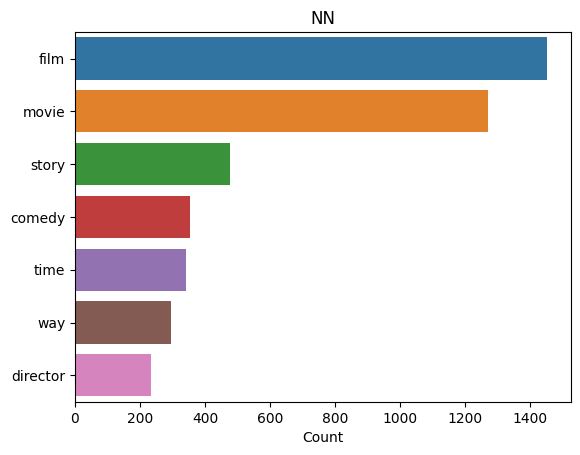

In [26]:
# most common nouns
plot_most_common_part_of_speech_barchart(df_all['text1'])

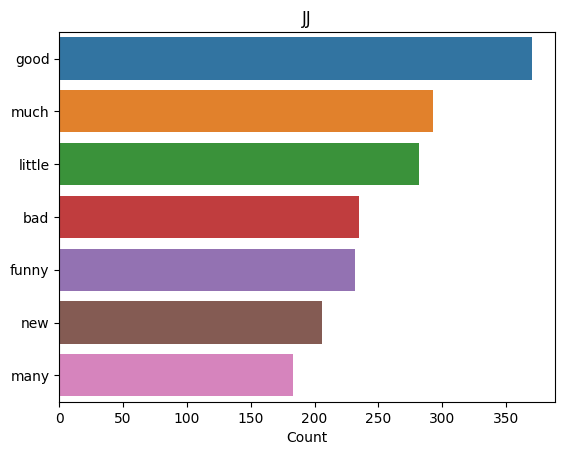

In [27]:
# most common adjective
plot_most_common_part_of_speech_barchart(df_all['text1'], part_of_speech="JJ")

### Text Complexity 

Next, I looked at the text complexity of the reviews using Flesch Reading Ease (FRE).

Text(0, 0.5, 'Count')

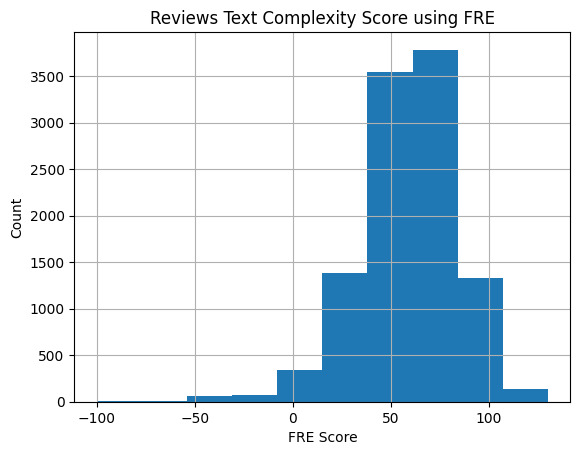

In [50]:
# graph text complexity using Flesch Reading Ease (FRE)
df_all['text'].apply(lambda x : flesch_reading_ease(x)).hist(range=[-100, 130])
plt.title("Reviews Text Complexity Score using FRE")
plt.xlabel("FRE Score")
plt.ylabel("Count")

Flesch Reading Ease Interpretation:  
– 0-30 College  
– 50-60 High school  
– 60+ Fourth grade

Looking at this graph you can see that most of the FRE scores fall around the 50-60 range. This would make most of the reviews understood by highschool level readers and above. 

### Label Analysis

Finally, the last thing I did was look at the distribution of the labels attributed to each review. Which was 1 if the review was positive and 0 if the review was negative.  

In [51]:
# count of the labels 
df_all['label'].value_counts()

1    5331
0    5331
Name: label, dtype: int64

Text(0, 0.5, 'Count')

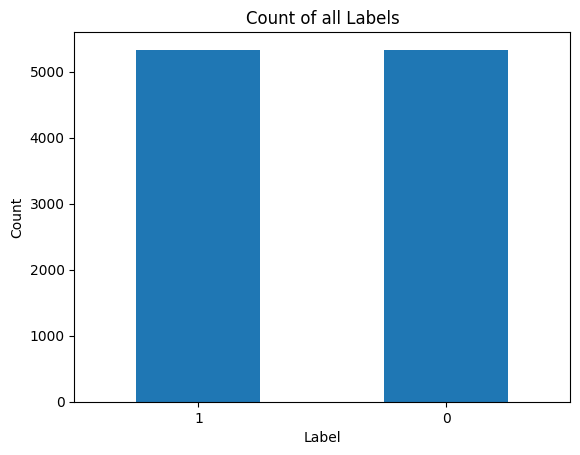

In [53]:
# bar graph of label count 
df_all['label'].value_counts().plot(kind='bar', rot=0)
plt.title("Count of all Labels")
plt.xlabel("Label")
plt.ylabel("Count")

You can see here that the labels throughout the whole dataset are perfectly even. So half of the reviews are positive and half of the reviews are negative. 

Text(0.5, 0, 'Label')

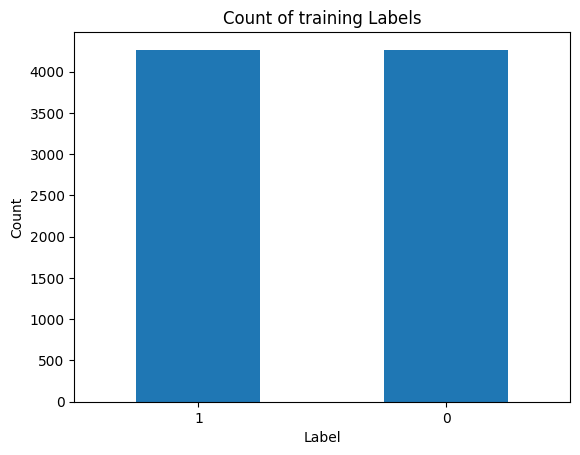

In [54]:
# bar graphs for each split (train, validation, test)
df_train['label'].value_counts().plot(kind='bar', rot=0)
plt.title("Count of training Labels")
plt.ylabel("Count")
plt.xlabel("Label")

Text(0.5, 0, 'Label')

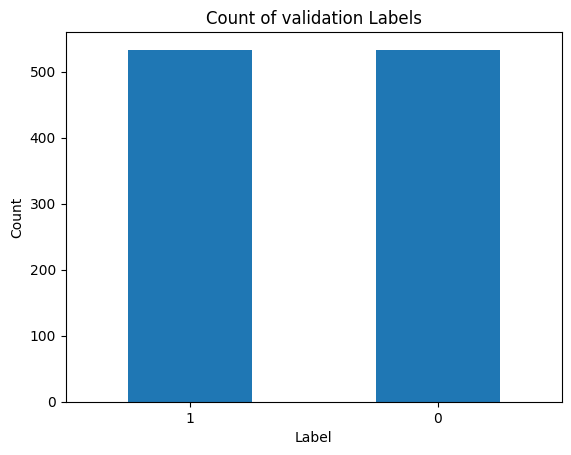

In [55]:
df_validation['label'].value_counts().plot(kind='bar', rot=0)
plt.title("Count of validation Labels")
plt.ylabel("Count")
plt.xlabel("Label")

Text(0.5, 0, 'Label')

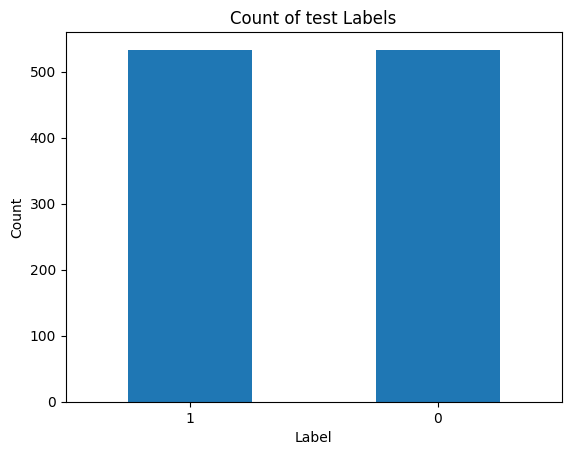

In [56]:
df_test['label'].value_counts().plot(kind='bar', rot=0)
plt.title("Count of test Labels")
plt.ylabel("Count")
plt.xlabel("Label")

The labels are also evenly split in all of the different splits. 